In [2]:
# 1. Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
# 2. Загрузка данных
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("Train shape:", train.shape)
print("Test shape:", test.shape)
train.head()

Train shape: (545, 10)
Test shape: (51, 10)


,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80


In [4]:
# 3. Предобработка: Разделение признаков
X = train.drop(['Happiness_Score'], axis=1)
y = train['Happiness_Score']

# Объединение train + test для общей обработки (например, OneHotEncoder)
all_data = pd.concat([X, test], axis=0)

# Категориальные и числовые признаки
cat_cols = ['City', 'Month', 'Traffic_Density']
num_cols = [col for col in X.columns if col not in cat_cols and col != 'Happiness_Score']

In [9]:
# 4. OneHotEncoding категориальных признаков

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)
test_processed = preprocessor.transform(test)


C:\Users\Odinaeva\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [10]:
# 5. Разделение train на train/val
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [12]:
# 6. Обучение и сравнение моделей

def evaluate_model(name, model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))  # вручную через sqrt
    r2 = r2_score(y_val, preds)
    print(f"{name}:")
    print(f"  MAE: {mae:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  R²: {r2:.3f}")
    print("-" * 30)
    return model, mae, rmse, r2

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}
for name, model in models.items():
    results[name] = evaluate_model(name, model, X_train, X_val, y_train, y_val)

Linear Regression:
  MAE: 1.193
  RMSE: 2.500
  R²: 0.997
------------------------------
Random Forest:
  MAE: 0.219
  RMSE: 0.286
  R²: 1.000
------------------------------
XGBoost:
  MAE: 0.321
  RMSE: 0.406
  R²: 1.000
------------------------------


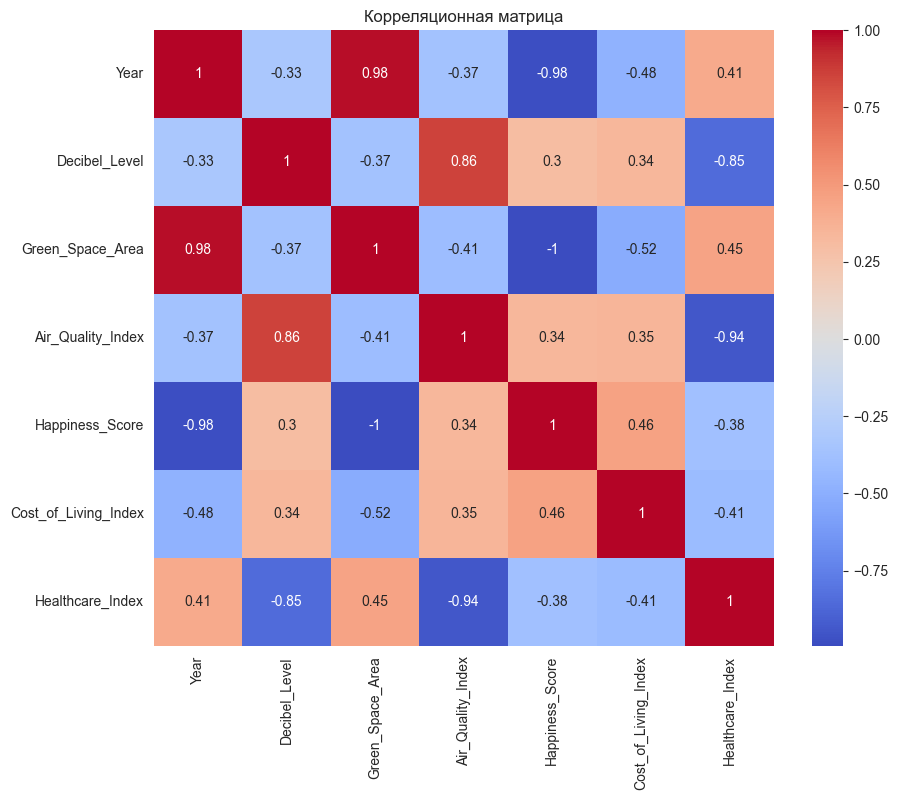

In [13]:
# 8. Корреляционный анализ
plt.figure(figsize=(10, 8))
corr = train.drop(columns=['City', 'Month', 'Traffic_Density']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

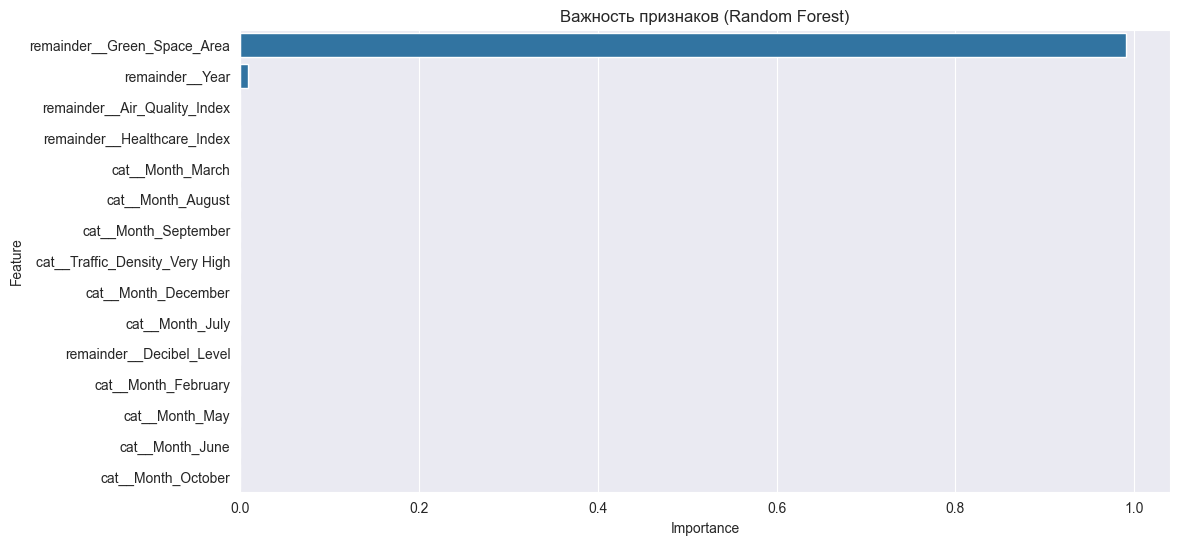

In [14]:
# 9. Важность признаков (RandomForest)
rf_model = results['Random Forest'][0]
feature_names = preprocessor.get_feature_names_out()
importances = rf_model.feature_importances_

feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature')
plt.title('Важность признаков (Random Forest)')
plt.show()

In [15]:
# 10. Прогноз на тестовых данных (например, с XGBoost)
final_model = results['XGBoost'][0]
test_preds = final_model.predict(test_processed)

# Сохранение предсказаний
submission = pd.DataFrame({
    'City': test['City'],
    'Month': test['Month'],
    'Year': test['Year'],
    'Predicted_Happiness_Score': test_preds
})
submission.to_csv('happiness_predictions.csv', index=False)
submission.head()

,City,Month,Year,Predicted_Happiness_Score
0,Auckland,January,2030,7.542825
1,Berlin,January,2030,7.368038
2,Cairo,January,2030,3.954468
3,Denver,January,2030,6.503140
4,Edinburgh,January,2030,7.366486


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [17]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()


,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index
0,New York,January,2024,70,High,35,40,6.5,100,80
1,Los Angeles,January,2024,65,Medium,40,50,6.8,90,75
2,Chicago,January,2024,60,Medium,30,55,7.0,85,70
3,London,January,2024,55,High,50,60,7.2,110,85
4,Paris,January,2024,60,High,45,65,6.9,95,80


In [18]:
# Проверим пропуски
train.info()
train.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  545 non-null    object 
 1   Month                 545 non-null    object 
 2   Year                  545 non-null    int64  
 3   Decibel_Level         545 non-null    int64  
 4   Traffic_Density       545 non-null    object 
 5   Green_Space_Area      545 non-null    int64  
 6   Air_Quality_Index     545 non-null    int64  
 7   Happiness_Score       545 non-null    float64
 8   Cost_of_Living_Index  545 non-null    int64  
 9   Healthcare_Index      545 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 42.7+ KB


City                    0
Month                   0
Year                    0
Decibel_Level           0
Traffic_Density         0
Green_Space_Area        0
Air_Quality_Index       0
Happiness_Score         0
Cost_of_Living_Index    0
Healthcare_Index        0
dtype: int64

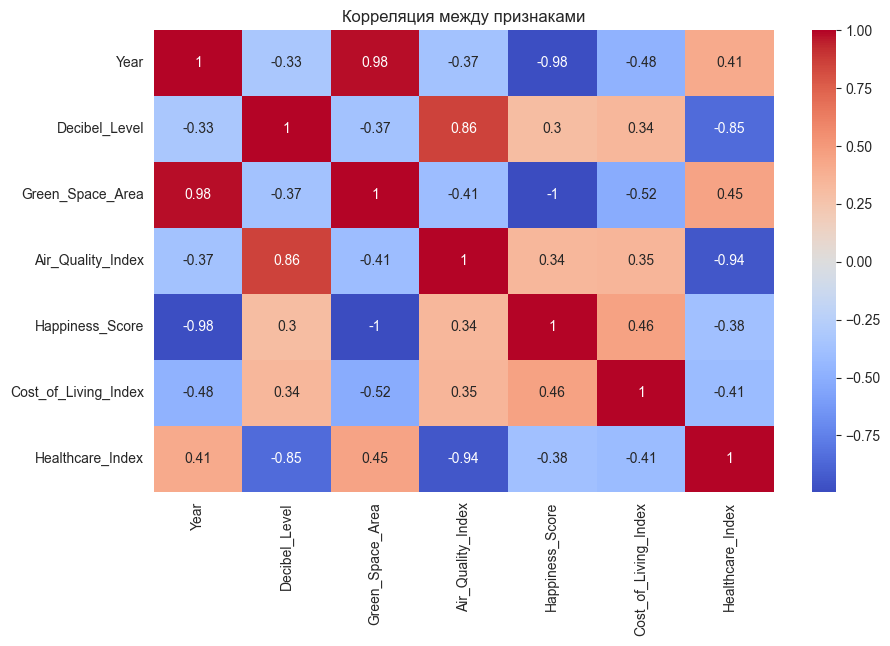

In [19]:
# Корреляция числовых признаков
plt.figure(figsize=(10, 6))
sns.heatmap(train.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Корреляция между признаками")
plt.show()


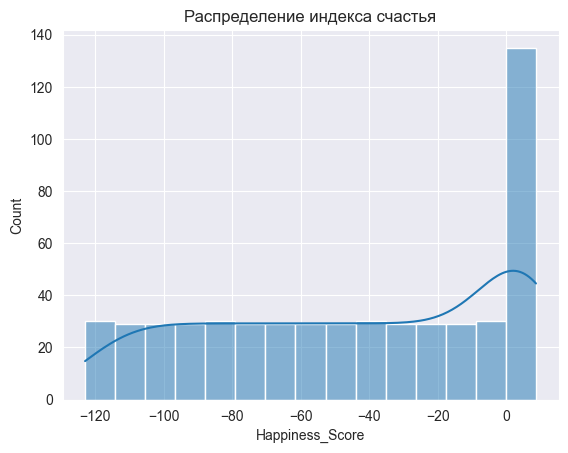

In [20]:
# Распределение целевой переменной
sns.histplot(train["Happiness_Score"], bins=15, kde=True)
plt.title("Распределение индекса счастья")
plt.show()


In [21]:
X = train.drop(columns=["Happiness_Score"])
y = train["Happiness_Score"]

# Категориальные признаки
cat_cols = ["City", "Month", "Traffic_Density"]


In [22]:
# Один и тот же препроцессор применим к train и test
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

X_processed = preprocessor.fit_transform(X)
test_processed = preprocessor.transform(test)

C:\Users\Odinaeva\PyCharmMiscProject\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [23]:
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

def evaluate_model(name, model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    mae = mean_absolute_error(y_val, preds)
    rmse = np.sqrt(mean_squared_error(y_val, preds))  # исправленный RMSE
    r2 = r2_score(y_val, preds)
    print(f"{name}:")
    print(f"  MAE: {mae:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  R²: {r2:.3f}")
    print("-" * 30)
    return model, mae, rmse, r2

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}
for name, model in models.items():
    results[name] = evaluate_model(name, model, X_train, X_val, y_train, y_val)


Linear Regression:
  MAE: 0.978
  RMSE: 2.068
  R²: 0.998
------------------------------
Random Forest:
  MAE: 0.212
  RMSE: 0.280
  R²: 1.000
------------------------------
XGBoost:
  MAE: 0.321
  RMSE: 0.406
  R²: 1.000
------------------------------


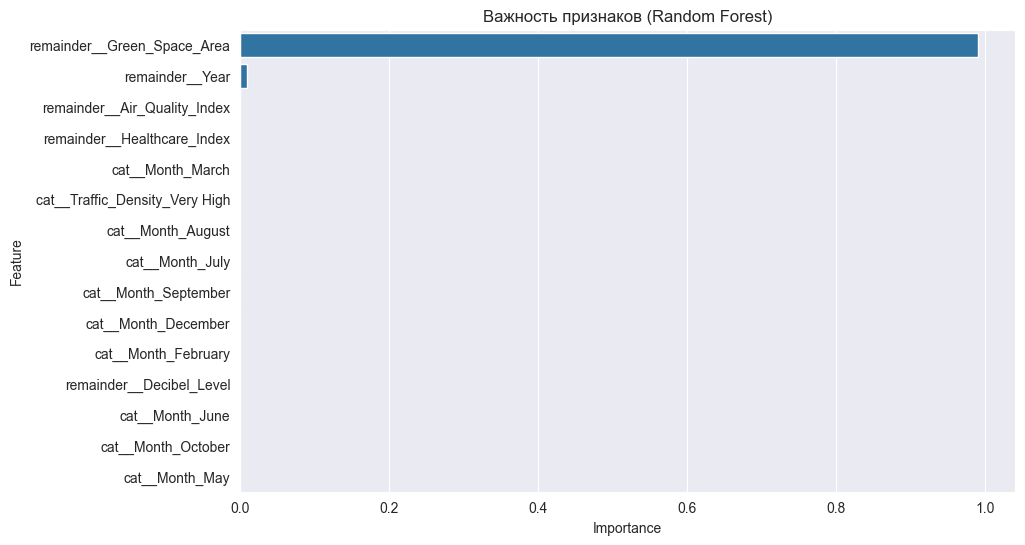

In [24]:
rf_model = results["Random Forest"][0]
importances = rf_model.feature_importances_
feature_names = preprocessor.get_feature_names_out()

feature_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_df.head(15), x="Importance", y="Feature")
plt.title("Важность признаков (Random Forest)")
plt.show()


In [25]:
final_model = rf_model  # лучшая модель по метрикам
final_predictions = final_model.predict(test_processed)

# Сохраняем результат
submission = test.copy()
submission["Predicted_Happiness_Score"] = final_predictions
submission.to_csv("submission.csv", index=False)
submission.head()


,City,Month,Year,Decibel_Level,Traffic_Density,Green_Space_Area,Air_Quality_Index,Happiness_Score,Cost_of_Living_Index,Healthcare_Index,Predicted_Happiness_Score
0,Auckland,January,2030,55,Low,80,40,8.4,110,97,6.539
1,Berlin,January,2030,50,Low,60,45,7.9,80,93,6.477
2,Cairo,January,2030,75,Very High,15,110,4.1,55,69,4.295
3,Denver,January,2030,60,Medium,40,50,7.5,95,89,5.796
4,Edinburgh,January,2030,55,Low,65,55,7.8,85,92,6.406
